In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time
from solver import Solver

plt.style.use('default')

In [ ]:
images = []
for page in range(10):
    images.append([])
    for i in range(3):
        images[page].append(cv2.imread(f"public_test\\0.{page}\\0{i}.pgm", cv2.IMREAD_GRAYSCALE))
    
answers = []
for page in range(10):
    answers.append([])  
    with open(f"public_test\\0.{page}\\ans.txt", 'r') as file:
        for line in file:
            answers[page].append(list(map(float, line.split(sep=' '))))


In [111]:
def main_test(img_num):
    answer = answers[img_num[0]][img_num[1]]
    img = images[img_num[0]][img_num[1]]
      
    hough_start = time.time()
    solver = Solver()
    coords  = solver.solve(img)
    hough_end = time.time()

    x_scatter = [coords[0][0], coords[1][0], coords[2][0]]
    y_scatter = [coords[0][1], coords[1][1], coords[2][1]]
    
    x_ans = [answer[0], answer[2], answer[4]]
    y_ans = [answer[1], answer[3], answer[5]]
    

    fig, axs = plt.subplots(ncols=1, figsize=(8, 8.5), dpi=100)
    
    axs.imshow(img, cmap='Greys')
    axs.scatter(x_ans, y_ans, color='blue', s=30)
    axs.scatter(x_scatter, y_scatter, color = 'red', s=30)

    
    # axs.set_title("Image")
 
    fig.suptitle(f"Intensity: {img_num[0]}\n"
                 f"True values: {answer}\n"
                 f"Expr values: {coords}\n"
                 f"Solution time: {hough_end - hough_start}",
                 fontsize=10)
    
    plt.show()

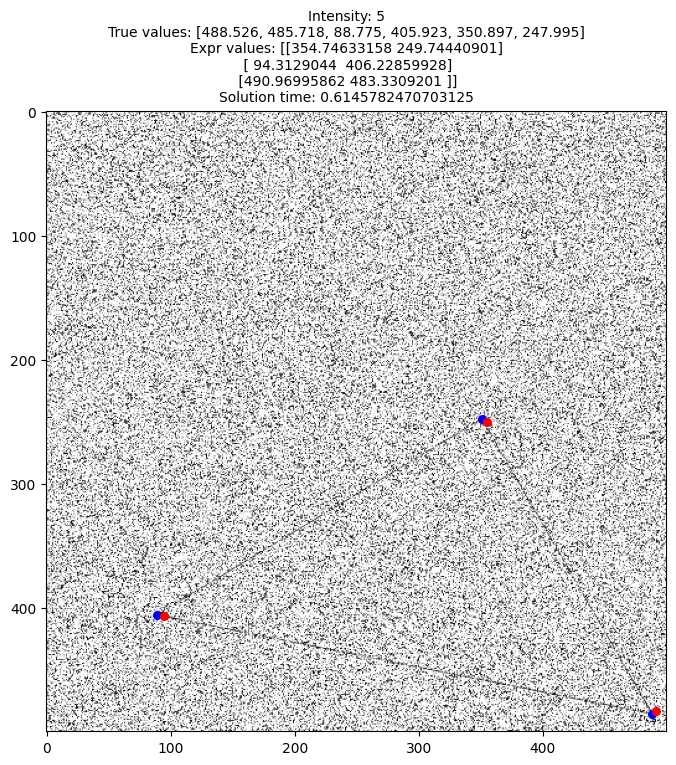

In [154]:
main_test([5,0])